In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plFuns import *
plt.rcParams['figure.figsize']=[16,9]

In [2]:
countries=['EN','ES','FR','IT','NL']
seasons=pd.Series({_cntr:Season(_cntr) for _cntr in countries})

manu=seasons['EN'].Teams['Man United']
citeh=seasons['EN'].Teams['Man City']
itstotlads=seasons['EN'].Teams['Tottenham']
chelsea=seasons['EN'].Teams['Chelsea']
barca=seasons['ES'].Teams['Barcelona']
rm=seasons['ES'].Teams['Real Madrid']

In [3]:
seasons['ES'].all.tail()

,Date,HomeTeam,AwayTeam,FTHG,FTAG
184,2018-01-14,Alaves,Sevilla,1.0,0.0
185,2018-01-14,Espanol,Ath Bilbao,1.0,1.0
186,2018-01-14,Levante,Celta,0.0,1.0
187,2018-01-14,Sociedad,Barcelona,2.0,4.0
188,2018-01-15,Betis,Leganes,3.0,2.0


In [4]:
for _season in seasons:
    print(_season.url)
    _season.calibrate()

http://www.football-data.co.uk/mmz4281/1718/E0.csv
http://www.football-data.co.uk/mmz4281/1718/SP1.csv
http://www.football-data.co.uk/mmz4281/1718/F1.csv
http://www.football-data.co.uk/mmz4281/1718/I1.csv
http://www.football-data.co.uk/mmz4281/1718/N1.csv


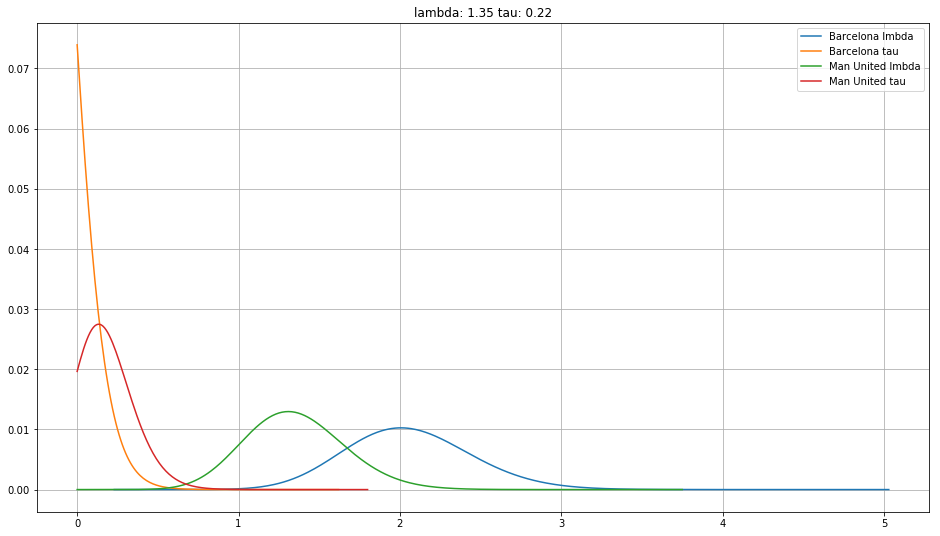

In [12]:
barca.plt()
manu.plt()

In [6]:
for _season in seasons:
    _season.SimulateRestOfSeason(nScenarios=int(1e5))

In [7]:
seasons['ES'].get_all_results()

,Average Goals Against,Average Goals Scored,Average Points,CL,GA,GF,Points,Win,lambda,tau
Barcelona,22.74,104.51,98.15,100.000,9,52,51,99.639,2.057,0.108
Valencia,38.24,80.61,79.16,99.558,19,40,40,0.263,1.441,0.364
Ath Madrid,23.10,55.12,76.56,98.595,8,28,42,0.097,0.720,0.108
Real Madrid,37.60,65.34,67.93,77.256,17,32,32,0.001,0.996,0.379
Villarreal,42.66,51.89,60.09,12.846,21,26,31,0.000,0.674,0.452
Sevilla,52.13,46.80,55.09,2.463,28,23,29,0.000,0.571,0.575
Celta,54.99,66.67,54.94,3.259,27,33,25,0.000,1.102,0.808
Getafe,38.48,46.95,54.57,2.294,18,23,26,0.000,0.568,0.384
Betis,72.74,66.74,52.06,1.064,36,33,27,0.000,1.130,1.269
Girona,54.90,53.64,51.60,0.728,28,28,26,0.000,0.675,0.725


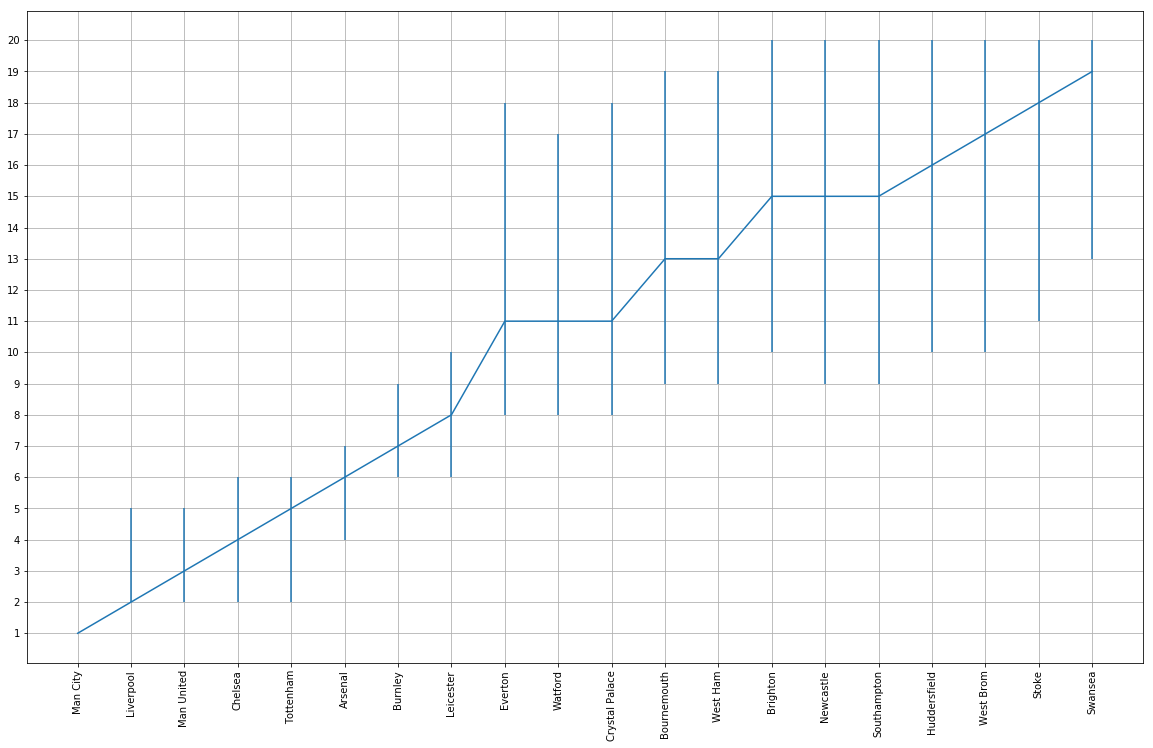

In [8]:
seasons['EN'].conf_int_plot(95,kind='')

In [9]:
manu + citeh

array([ 0.2334,  0.1818,  0.5848])

In [10]:
manu+chelsea 

array([ 0.4455,  0.2414,  0.3131])

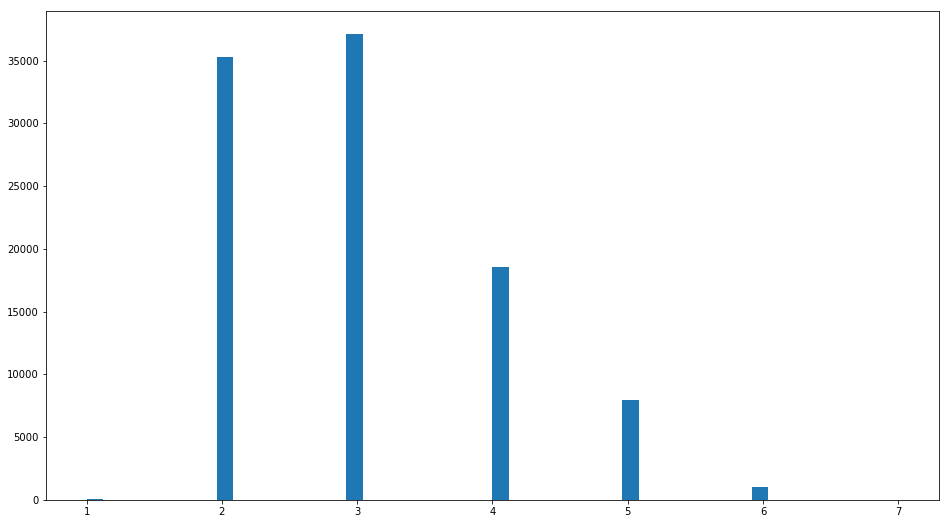

In [13]:
plt.hist(manu.place_scenarios,50);